In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
%matplotlib inline

In [2]:
data = pd.read_csv('Loan_Default.csv', header=0)
data.head(100)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,24985,2019,cf,Female,nopre,type2,p3,l1,nopc,b/c,...,CIB,642,CIB,35-44,to_inst,86.931818,North,direct,0,45.0
96,24986,2019,ncf,Male,pre,type3,p4,l1,nopc,nob/c,...,EXP,872,CIB,65-74,to_inst,111.046512,south,direct,1,NaN
97,24987,2019,NaN,Sex Not Available,nopre,type1,p4,l1,nopc,nob/c,...,EXP,898,CIB,55-64,to_inst,65.625000,south,direct,0,45.0
98,24988,2019,ncf,Sex Not Available,pre,type1,p1,l1,nopc,nob/c,...,CIB,734,CIB,45-54,to_inst,81.354515,south,direct,0,31.0


In [3]:
dataclean=data.copy()
print(dataclean.shape)
dataclean.info()

(148670, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges 

In [4]:
#Basic cleaning and tidying up of Dataset before perfroming statistical analysis

dataclean.columns=dataclean.columns.str.upper()
dataclean.columns = dataclean.columns.str.replace("_"," ")
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   YEAR                       148670 non-null  int64  
 2   LOAN LIMIT                 145326 non-null  object 
 3   GENDER                     148670 non-null  object 
 4   APPROV IN ADV              147762 non-null  object 
 5   LOAN TYPE                  148670 non-null  object 
 6   LOAN PURPOSE               148536 non-null  object 
 7   CREDIT WORTHINESS          148670 non-null  object 
 8   OPEN CREDIT                148670 non-null  object 
 9   BUSINESS OR COMMERCIAL     148670 non-null  object 
 10  LOAN AMOUNT                148670 non-null  int64  
 11  RATE OF INTEREST           112231 non-null  float64
 12  INTEREST RATE SPREAD       112031 non-null  float64
 13  UPFRONT CHARGES            10

In [5]:
# Getting dataframes by datatype
dtypes = pd.DataFrame(dataclean.dtypes).reset_index()

cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)
        
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   YEAR                       148670 non-null  int64  
 2   LOAN LIMIT                 145326 non-null  object 
 3   GENDER                     148670 non-null  object 
 4   APPROV IN ADV              147762 non-null  object 
 5   LOAN TYPE                  148670 non-null  object 
 6   LOAN PURPOSE               148536 non-null  object 
 7   CREDIT WORTHINESS          148670 non-null  object 
 8   OPEN CREDIT                148670 non-null  object 
 9   BUSINESS OR COMMERCIAL     148670 non-null  object 
 10  LOAN AMOUNT                148670 non-null  int64  
 11  RATE OF INTEREST           112231 non-null  float64
 12  INTEREST RATE SPREAD       112031 non-null  float64
 13  UPFRONT CHARGES            10

In [6]:
#Only the variable and numbers of the data

# Only the variables and numbers
datacleanNum = dataclean[num_vars]
datacleanNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    148670 non-null  int64  
 1   YEAR                  148670 non-null  int64  
 2   LOAN AMOUNT           148670 non-null  int64  
 3   RATE OF INTEREST      112231 non-null  float64
 4   INTEREST RATE SPREAD  112031 non-null  float64
 5   UPFRONT CHARGES       109028 non-null  float64
 6   TERM                  148629 non-null  float64
 7   PROPERTY VALUE        133572 non-null  float64
 8   INCOME                139520 non-null  float64
 9   CREDIT SCORE          148670 non-null  int64  
 10  LTV                   133572 non-null  float64
 11  STATUS                148670 non-null  int64  
 12  DTIR1                 124549 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 14.7 MB


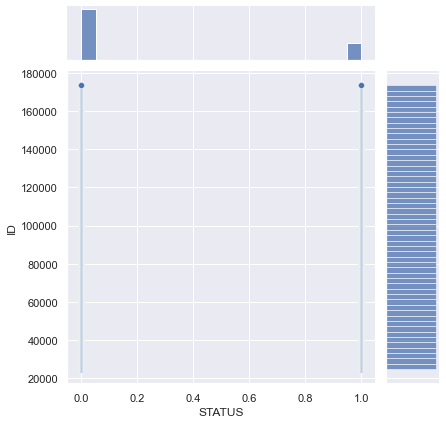

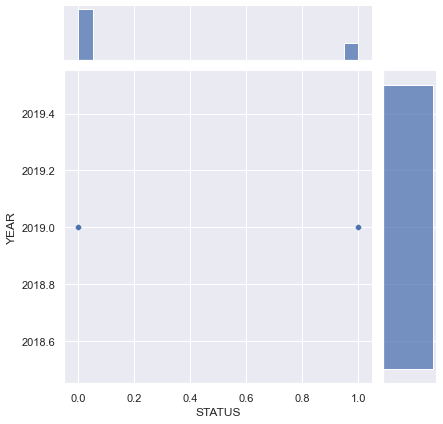

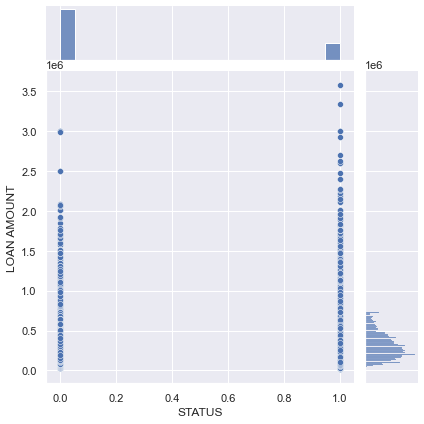

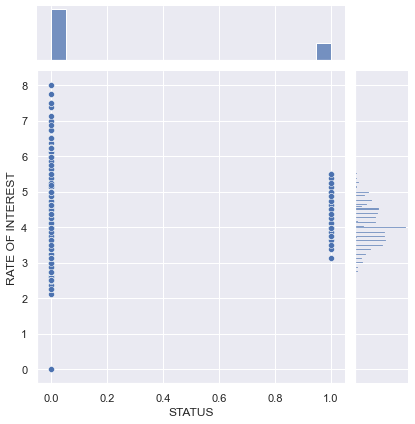

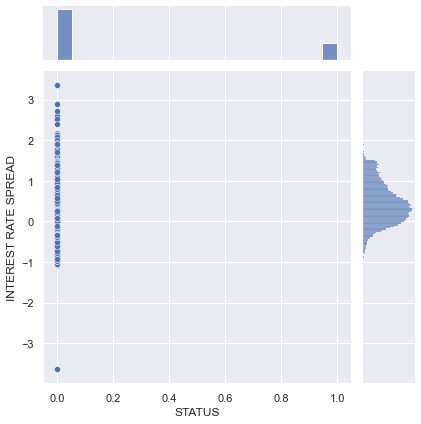

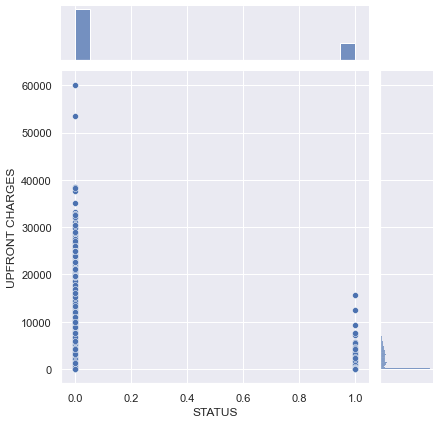

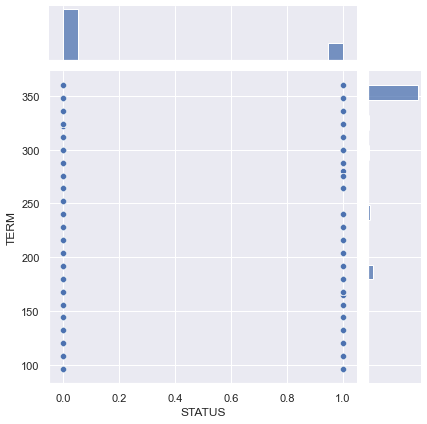

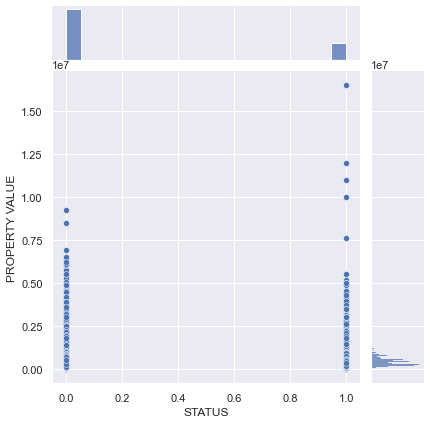

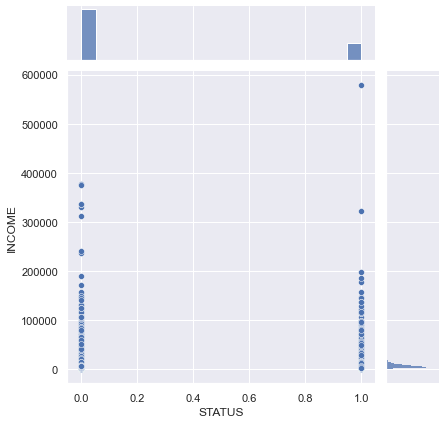

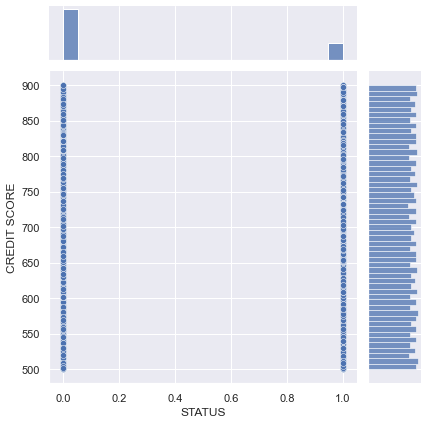

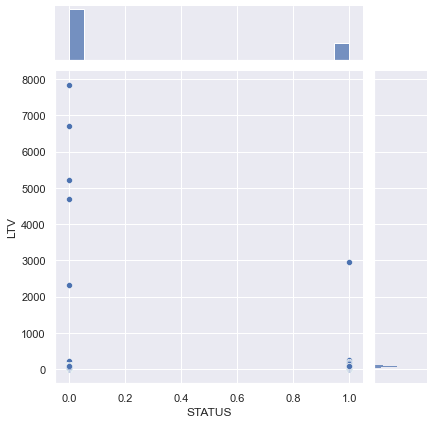

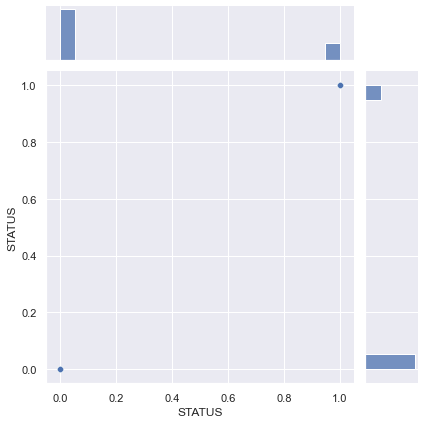

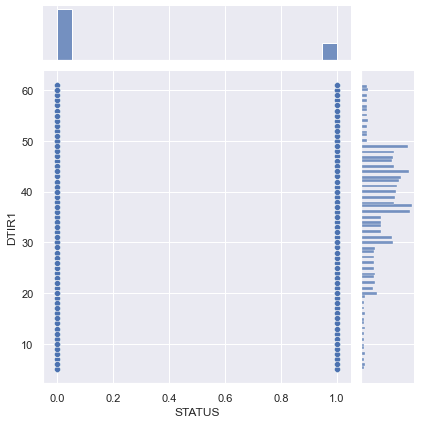

In [7]:
# Draw pairs of variables against one another
for i in datacleanNum:
    sb.jointplot(x='STATUS',y=i,data = datacleanNum)

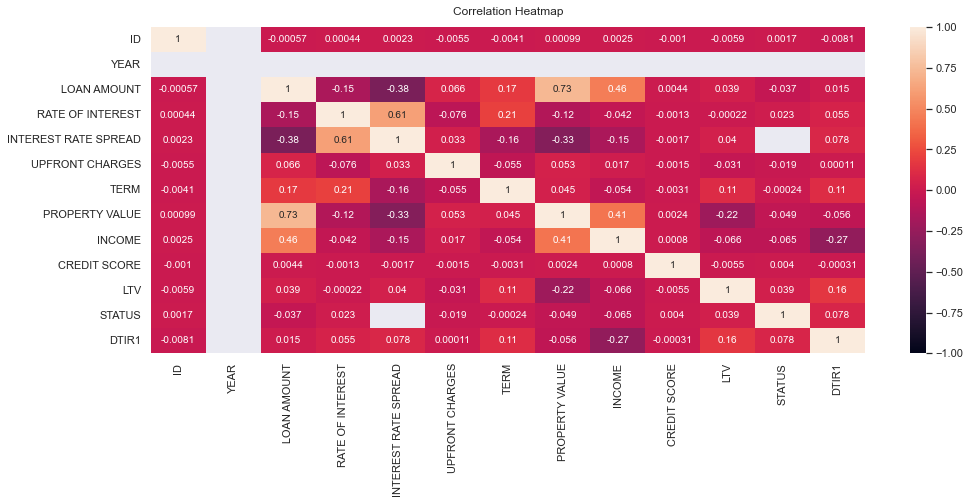

In [21]:
# Correlation of the numbers part
corr = datacleanNum.corr()
# Correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sb.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [9]:
'''
ID is a simple and irrelevant label and not required in prediction can delete

Year is constant throughout. Being a single value it does not affect status can delete

Credit score has close to zero correlation other variables can delete

Interest rate spread - only non defaulters have it not required 

'''

'\nID is a simple and irrelevant label and not required in prediction can delete\n\nYear is constant throughout. Being a single value it does not affect status can delete\n\nCredit score has close to zero correlation other variables can delete\n\nInterest rate spread - only non defaulters have it not required \n\n'

In [10]:
# Deleting the above mentioned variables
COL=['YEAR','ID','INTEREST RATE SPREAD','CREDIT SCORE','TERM']
for i in COL:
    dataclean.drop(columns=i,inplace=True)
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LOAN LIMIT                 145326 non-null  object 
 1   GENDER                     148670 non-null  object 
 2   APPROV IN ADV              147762 non-null  object 
 3   LOAN TYPE                  148670 non-null  object 
 4   LOAN PURPOSE               148536 non-null  object 
 5   CREDIT WORTHINESS          148670 non-null  object 
 6   OPEN CREDIT                148670 non-null  object 
 7   BUSINESS OR COMMERCIAL     148670 non-null  object 
 8   LOAN AMOUNT                148670 non-null  int64  
 9   RATE OF INTEREST           112231 non-null  float64
 10  UPFRONT CHARGES            109028 non-null  float64
 11  NEG AMMORTIZATION          148549 non-null  object 
 12  INTEREST ONLY              148670 non-null  object 
 13  LUMP SUM PAYMENT           14

In [11]:
# Only the objects OF THE DATA

dataclean_cat = dataclean[cat_vars]
dataclean_cat = dataclean_cat.join(datacleanNum['STATUS'])
dataclean_cat['STATUS'] = dataclean_cat['STATUS'].astype(str)
dataclean_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   LOAN LIMIT                 145326 non-null  object
 1   GENDER                     148670 non-null  object
 2   APPROV IN ADV              147762 non-null  object
 3   LOAN TYPE                  148670 non-null  object
 4   LOAN PURPOSE               148536 non-null  object
 5   CREDIT WORTHINESS          148670 non-null  object
 6   OPEN CREDIT                148670 non-null  object
 7   BUSINESS OR COMMERCIAL     148670 non-null  object
 8   NEG AMMORTIZATION          148549 non-null  object
 9   INTEREST ONLY              148670 non-null  object
 10  LUMP SUM PAYMENT           148670 non-null  object
 11  CONSTRUCTION TYPE          148670 non-null  object
 12  OCCUPANCY TYPE             148670 non-null  object
 13  SECURED BY                 148670 non-null  

C:\Users\Arin\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


'for i in dataclean_cat:\n    plt.figsize=(16,6)\n    sb.set_theme(style=\'darkgrid\')\n    sb.histplot(data=dataclean_cat, x=i, hue="STATUS", multiple="dodge", shrink=.8, stat=\'count\')\n    plt.show()'

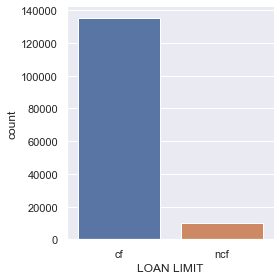

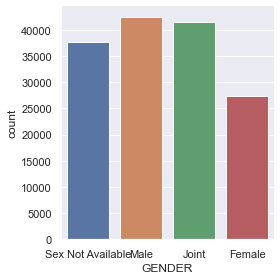

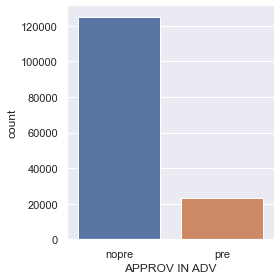

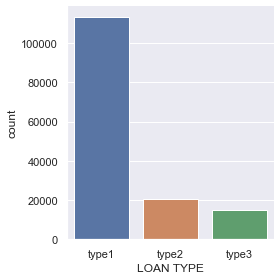

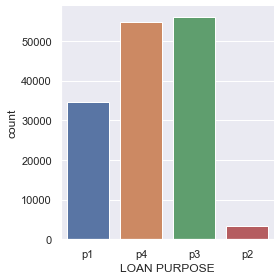

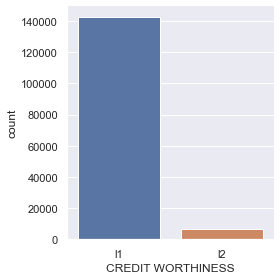

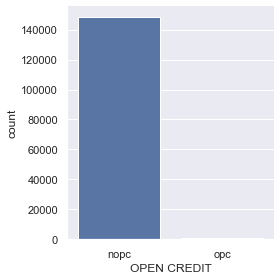

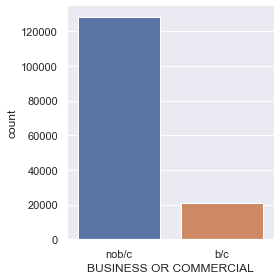

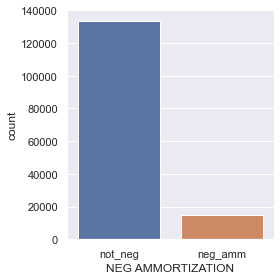

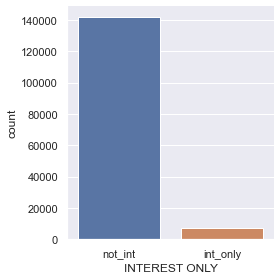

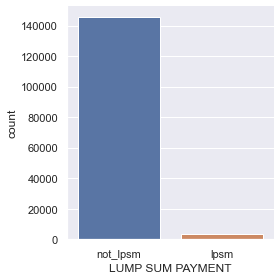

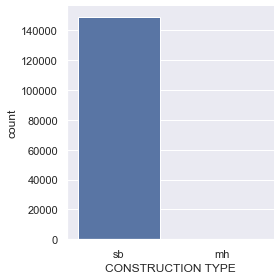

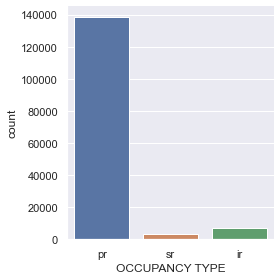

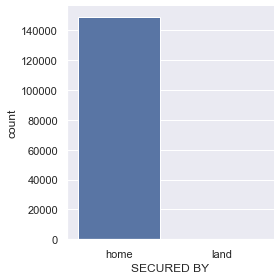

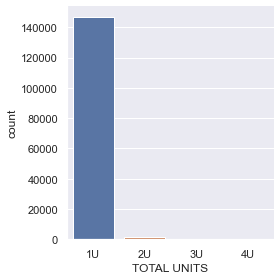

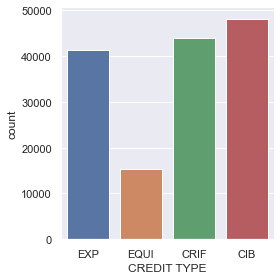

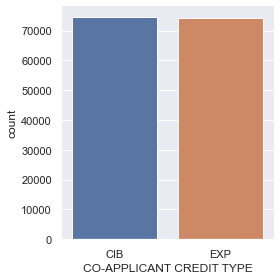

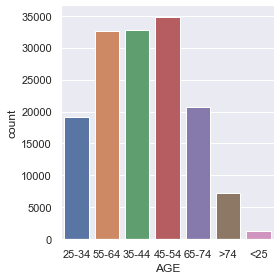

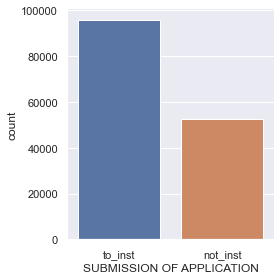

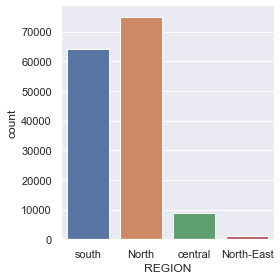

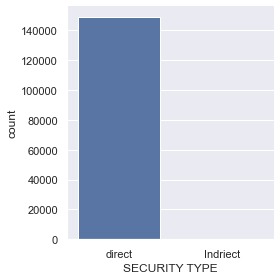

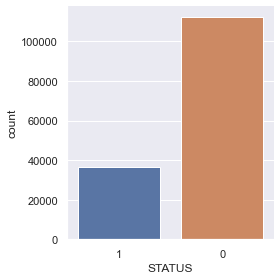

In [12]:

for i in dataclean_cat:
    sb.catplot(x=i, kind = 'count', data = dataclean_cat, height = 4)
'''for i in dataclean_cat:
    plt.figsize=(16,6)
    sb.set_theme(style='darkgrid')
    sb.histplot(data=dataclean_cat, x=i, hue="STATUS", multiple="dodge", shrink=.8, stat='count')
    plt.show()'''

In [13]:
'''
Secured by - skewed towards home (non home has count of only 33)  not required 

Total units - highly skewed towards one unit (non one unit has count of only 2190) - not required 

Security type - skewed towards direct (non direct only 33) not required 

Construction type - skewed towards sb (non sb only 33) not required 

Occupancy type - highly skewed towards pr (non pr is 10468) 

Lump sum - highly skewed towards not_lpsm (lpsm is only 3384) 

'''

'\nSecured by - skewed towards home (non home has count of only 33)  not required \n\nTotal units - highly skewed towards one unit (non one unit has count of only 2190) - not required \n\nSecurity type - skewed towards direct (non direct only 33) not required \n\nConstruction type - skewed towards sb (non sb only 33) not required \n\nOccupancy type - highly skewed towards pr (non pr is 10468) \n\nLump sum - highly skewed towards not_lpsm (lpsm is only 3384) \n\n'

In [14]:
COL=['OPEN CREDIT','CONSTRUCTION TYPE','TOTAL UNITS','SECURED BY','SECURITY TYPE','OCCUPANCY TYPE','LUMP SUM PAYMENT']
for i in COL:
    dataclean.drop(columns=i,inplace=True)
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LOAN LIMIT                 145326 non-null  object 
 1   GENDER                     148670 non-null  object 
 2   APPROV IN ADV              147762 non-null  object 
 3   LOAN TYPE                  148670 non-null  object 
 4   LOAN PURPOSE               148536 non-null  object 
 5   CREDIT WORTHINESS          148670 non-null  object 
 6   BUSINESS OR COMMERCIAL     148670 non-null  object 
 7   LOAN AMOUNT                148670 non-null  int64  
 8   RATE OF INTEREST           112231 non-null  float64
 9   UPFRONT CHARGES            109028 non-null  float64
 10  NEG AMMORTIZATION          148549 non-null  object 
 11  INTEREST ONLY              148670 non-null  object 
 12  PROPERTY VALUE             133572 non-null  float64
 13  INCOME                     13

In [15]:
dataclean.isna().sum()

LOAN LIMIT                    3344
GENDER                           0
APPROV IN ADV                  908
LOAN TYPE                        0
LOAN PURPOSE                   134
CREDIT WORTHINESS                0
BUSINESS OR COMMERCIAL           0
LOAN AMOUNT                      0
RATE OF INTEREST             36439
UPFRONT CHARGES              39642
NEG AMMORTIZATION              121
INTEREST ONLY                    0
PROPERTY VALUE               15098
INCOME                        9150
CREDIT TYPE                      0
CO-APPLICANT CREDIT TYPE         0
AGE                            200
SUBMISSION OF APPLICATION      200
LTV                          15098
REGION                           0
STATUS                           0
DTIR1                        24121
dtype: int64

In [16]:
def replace_na(dataclean):
    na_cols = [cols for cols in dataclean.columns]
    for cols in na_cols:
        md = dataclean[cols].mode()[0]
        dataclean[cols] = dataclean[cols].fillna(md)
    return dataclean
dataclean = replace_na(dataclean)

In [17]:
dataclean.isna().sum()

LOAN LIMIT                   0
GENDER                       0
APPROV IN ADV                0
LOAN TYPE                    0
LOAN PURPOSE                 0
CREDIT WORTHINESS            0
BUSINESS OR COMMERCIAL       0
LOAN AMOUNT                  0
RATE OF INTEREST             0
UPFRONT CHARGES              0
NEG AMMORTIZATION            0
INTEREST ONLY                0
PROPERTY VALUE               0
INCOME                       0
CREDIT TYPE                  0
CO-APPLICANT CREDIT TYPE     0
AGE                          0
SUBMISSION OF APPLICATION    0
LTV                          0
REGION                       0
STATUS                       0
DTIR1                        0
dtype: int64

In [18]:
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LOAN LIMIT                 148670 non-null  object 
 1   GENDER                     148670 non-null  object 
 2   APPROV IN ADV              148670 non-null  object 
 3   LOAN TYPE                  148670 non-null  object 
 4   LOAN PURPOSE               148670 non-null  object 
 5   CREDIT WORTHINESS          148670 non-null  object 
 6   BUSINESS OR COMMERCIAL     148670 non-null  object 
 7   LOAN AMOUNT                148670 non-null  int64  
 8   RATE OF INTEREST           148670 non-null  float64
 9   UPFRONT CHARGES            148670 non-null  float64
 10  NEG AMMORTIZATION          148670 non-null  object 
 11  INTEREST ONLY              148670 non-null  object 
 12  PROPERTY VALUE             148670 non-null  float64
 13  INCOME                     14

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
obj_var=pd.DataFrame(dataclean.select_dtypes('object'))
for i in obj_var:
    label = le.fit_transform(dataclean[i])
    dataclean.drop(i, axis=1, inplace=True)
    dataclean[i] = label
dataclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LOAN AMOUNT                148670 non-null  int64  
 1   RATE OF INTEREST           148670 non-null  float64
 2   UPFRONT CHARGES            148670 non-null  float64
 3   PROPERTY VALUE             148670 non-null  float64
 4   INCOME                     148670 non-null  float64
 5   LTV                        148670 non-null  float64
 6   STATUS                     148670 non-null  int64  
 7   DTIR1                      148670 non-null  float64
 8   LOAN LIMIT                 148670 non-null  int32  
 9   GENDER                     148670 non-null  int32  
 10  APPROV IN ADV              148670 non-null  int32  
 11  LOAN TYPE                  148670 non-null  int32  
 12  LOAN PURPOSE               148670 non-null  int32  
 13  CREDIT WORTHINESS          14

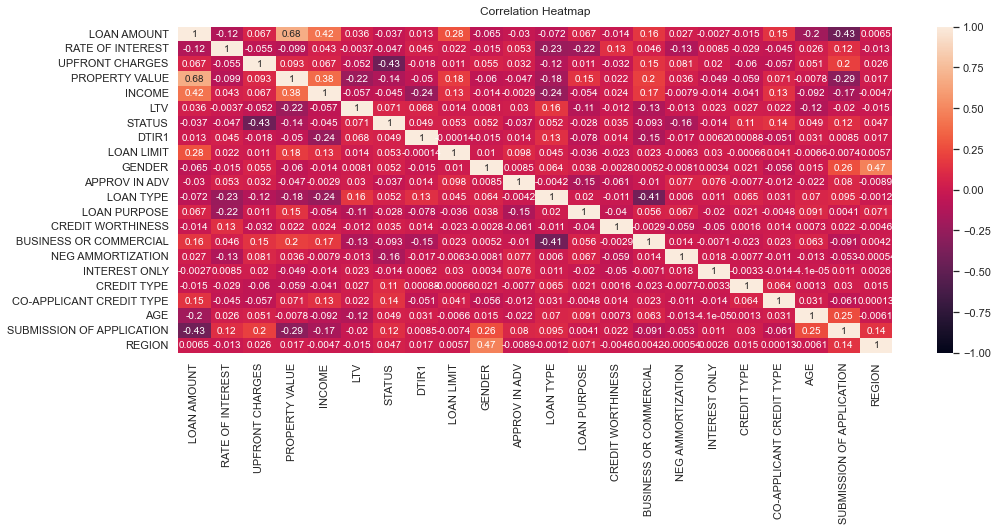

In [20]:
#Correlation of the numbers part
corr = dataclean.corr()
# Correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sb.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9849330732494788

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9850675993811798



<AxesSubplot:>

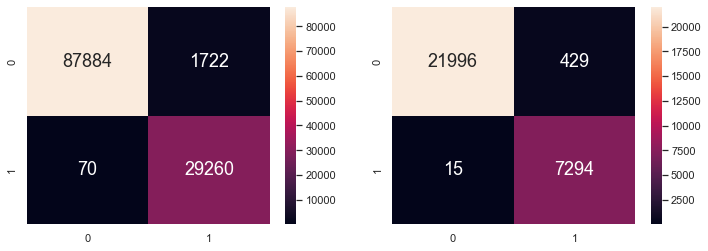

In [22]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Split the Dataset into Train and Test
train_set,test_set = train_test_split(dataclean, test_size = 0.20)

y_train = train_set['STATUS']
X_train = train_set.drop(columns=['STATUS'])
y_test = test_set['STATUS']
X_test = test_set.drop(columns=['STATUS'])

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

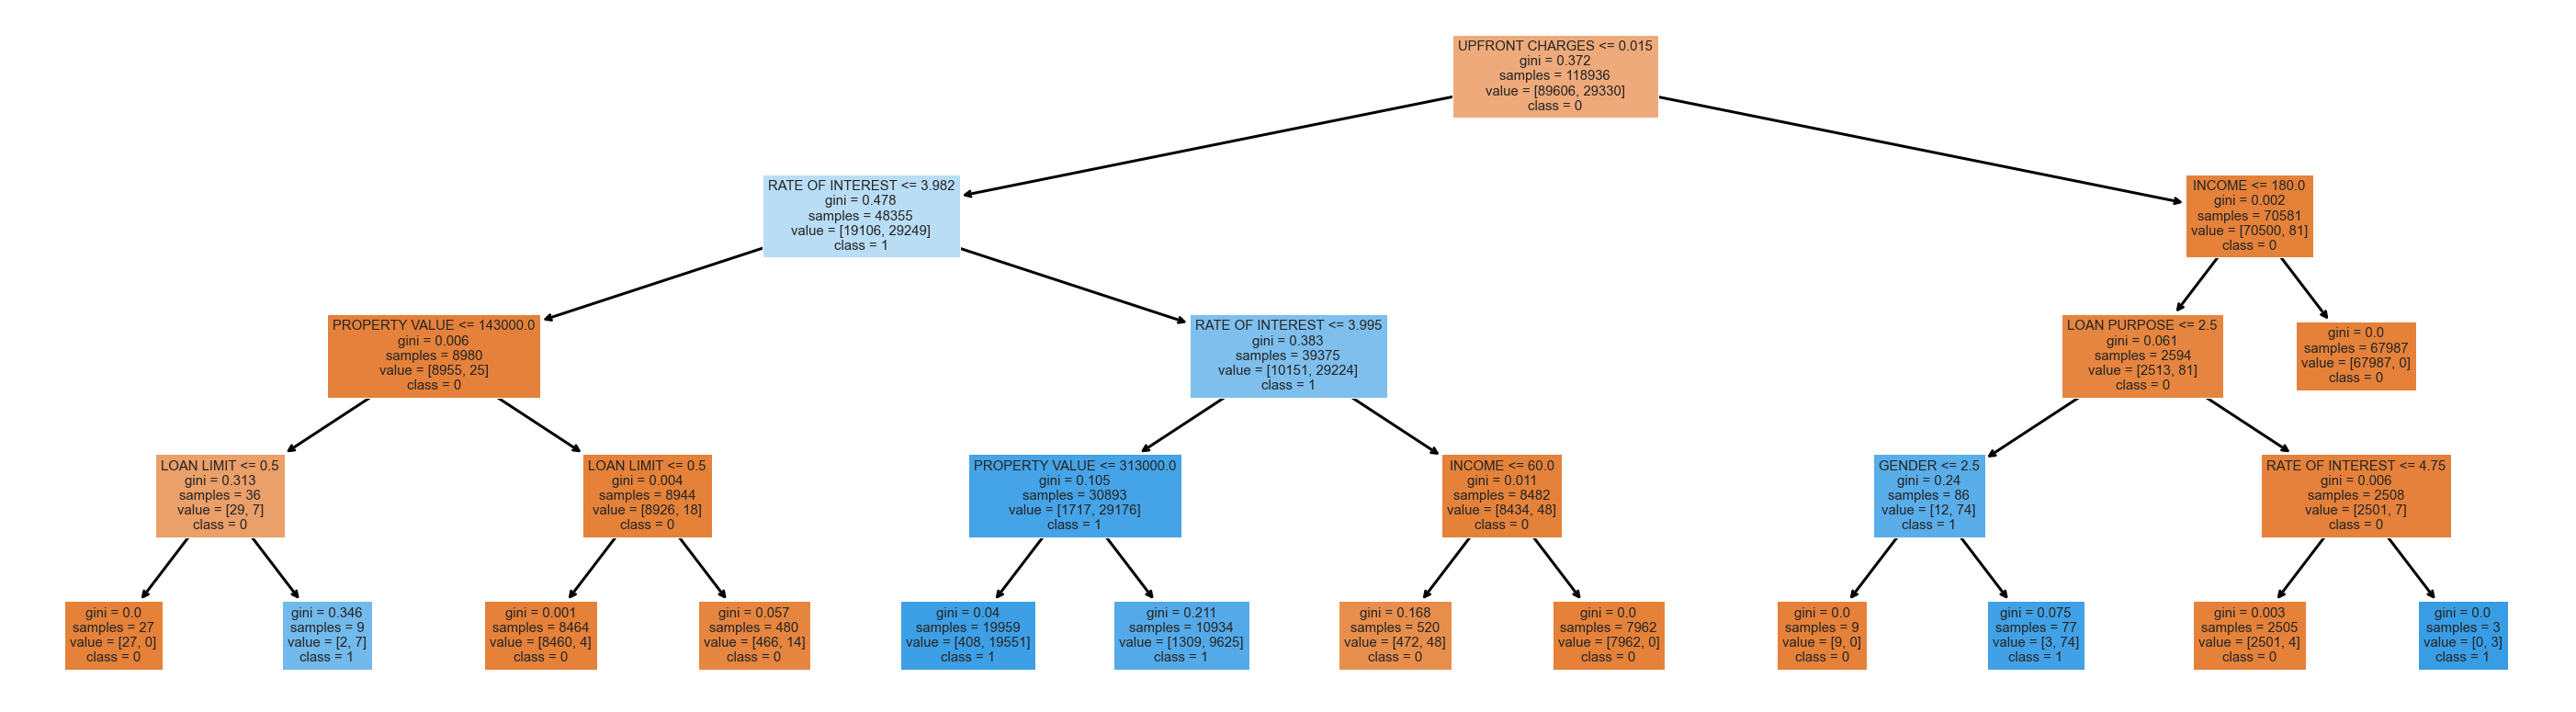

In [23]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(50, 14))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

0.9856057039079841


<AxesSubplot:>

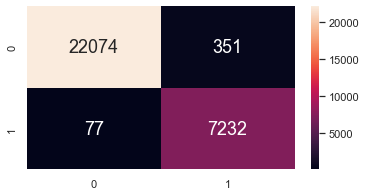

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Fitting Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions
rf_preds = rf.predict(X_test)

# Performance
print(accuracy_score(y_test, rf_preds))

f, axes = plt.subplots(1, 1, figsize=(6, 3))

sb.heatmap(confusion_matrix(y_test, rf_preds), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Mean cross-validation score: 0.99
0.9856393354409094


<AxesSubplot:>

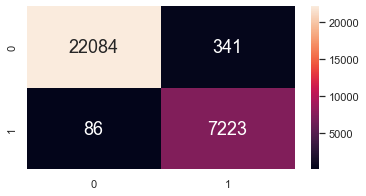

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
# Fitting Model
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

# Scores on train set
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

# Predictions
xgb_preds = xgbc.predict(X_test)

# Test set performance
print(accuracy_score(y_test, xgb_preds))
f, axes = plt.subplots(1, 1, figsize=(6, 3))

sb.heatmap(confusion_matrix(y_test, xgb_preds), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

0.8118652048160355
0.8697787045133517


<AxesSubplot:>

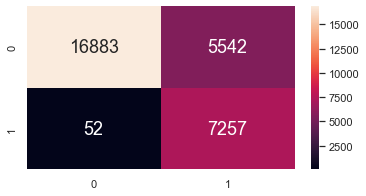

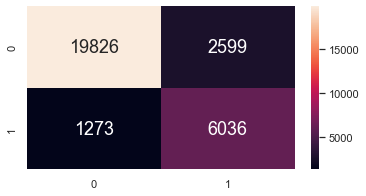

In [26]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Fitting Model: Guassian
naive_bayes = GaussianNB()
naive_bayes.fit(X_train , y_train)

#Predict on test data
nb_preds = naive_bayes.predict(X_test)

# Test set performance: 0.7516
print(accuracy_score(y_test, nb_preds))
f, axes = plt.subplots(1, 1, figsize=(6, 3))

sb.heatmap(confusion_matrix(y_test, nb_preds), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


# Fitting Model: Bernouli
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train , y_train)

#Predict on test data
nb_preds = naive_bayes.predict(X_test)

# Test set performance: 0.7865
print(accuracy_score(y_test, nb_preds))
f, axes = plt.subplots(1, 1, figsize=(6, 3))

sb.heatmap(confusion_matrix(y_test, nb_preds), 
           annot = True, fmt=".0f", annot_kws={"size": 18})